# Analysing the Political, Economic, and Demographic Predictors of Crime in Major US Cities

## Introduction

We seek to analyze, using publicly available data, the key drivers of crime in major US cities.

## Methodology

Several datasets are used in this research. These data are publicly available and verifiable.

Demographic and economic data are retrieved from the US Census website. The tables used are from the 2018 American Community Survey 1-Year Estimates Data Profiles. Economic data is taken from table DP03 and demographic data is taken from table DP05. The data was sorted, on the American census cedsci web page by “Place within State”, with all places in all states selected.

Crime data was retrieved from the FBI website. The particular table used was from the 2018 Crime in the United States report, table 8, Offenses Known to Law Enforcement by State by City, 2018. Crime and census data were available as .csv or .xlsx downloads and were processed using the python data analysis library pandas.

Data on the mayors of US cities was taken from an archived 2018 version of the Wikipedia page “List of mayors of the 50 largest cities in the united states”. This was retrieved and processed using the python web-scraping library BeautifulSoup4.

Data retrieved from the three sources were not in particularly similar formats, or entirely complete, and some amount of data wrangling was required to make the multiple datasets usable.

The data retrieved from the US Census contained absolute values (such as the number of males), percentage values (percentage of males in the population), and margin of error estimates for both absolute and percentage values. We are primarily concerned with the percentage values as descriptors of a city’s demographics, and thus dropped the columns that correspond to absolute values and margins of error. Any qualitative or categorical data in both tables from the US Census were dropped. The few missing values that remained in the dataset were filled with the mean value of their respective categories.

It could not be verified at a glance that the three data sources used the same naming convention for cities and states. To allow the datasets to be more accurately matched, the city and state labels were converted to a common format. City and state names were made lowercase, non-alphabetical characters were removed, and the word ‘city’ was removed. City and state names were then appended to create a city_state variable (such as newyorknewyork, losangelescalifornia).

Crime, demographic, economic, and mayoral partisanship data were combined into a single dataset. Dummy variables were used to represent the categorical mayoral partisanship data. For cities for which mayoral partisanship data was not available, missing dummy values were filled using the mean of the valid observations. After this process, all values in the dataset were numerical.

The above processes are documented in the Jupyter Notebook "main.ipynb".

Before proceeding with the analysis, several independent variables were removed such that no two remaining independent variables had an absolute correlation of greater than 0.8. The dataset was then standardized. The mean is subtracted from each value, and the remainder is divided by the standard deviation. This ensures each independent variable has values which are on the same scale.

Two analyses were performed on the combined dataset.

The first analysis aimed to determine the importance of each independent variable. This is measured using the increase in the R-squared value when the particular independent variable is added to a multiple regression model last. The values calculated are labeled "impt".

Second, correlation analysis was performed. The correlation between each independent variable and the violent crime rate was recorded.

The results of the analyses are presented below.

## Results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from customlibs import core

In [2]:
data = pd.read_csv("data.csv", index_col=0)
data = core.rm_corr(data, 0.8)
data = core.standardize(data)
impt = core.get_impt(core.rm_corr(data, 0.8), "violent_crime_rate")
corr = core.get_corr(core.rm_corr(data, 0.8), "violent_crime_rate")
df = pd.DataFrame()
df["impt"] = impt
df["corr"] = corr
df = df.sort_values("impt", ascending=False)
df.to_csv("result.csv")

The ten independent variables with the highest importance are as follows:

In [3]:
df.head(10)

,impt,corr
Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican,0.011146,0.109120
party_Democratic,0.006981,0.162227
Percent Estimate!!RACE!!Total population!!One race!!Asian!!Asian Indian,0.005101,-0.254521
Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!White alone,0.004914,-0.257118
"Percent Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- carpooled",0.004672,0.199627
Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race,0.003969,0.077717
Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!With Food Stamp/SNAP benefits in the past 12 months,0.003584,0.581885
Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage,0.003572,-0.168505
Percent Estimate!!RACE!!Total population!!One race!!Asian!!Chinese,0.003352,-0.194665
Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families!!With related children of the householder under 18 years!!With related children of the householder under 5 years only,0.003047,0.514620


The ten independent variables with the lowest importance are as follows:

In [4]:
df.tail(10)

,impt,corr
Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force!!Unemployed!!With health insurance coverage!!With public coverage,2.112142e-05,0.335836
"Percent Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Production, transportation, and material moving occupations",1.622193e-05,0.335872
Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population under 19 years!!No health insurance coverage,1.160236e-05,-0.014894
Percent Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Sales and office occupations,1.015124e-05,-0.108691
Percent Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Unpaid family workers,9.684794e-06,-0.108183
"Percent Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations",9.570616e-06,-0.364349
Percent Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Service occupations,7.511687e-06,0.457180
Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!With retirement income,5.849930e-07,-0.108016
Percent Estimate!!RACE!!Total population!!One race!!Asian!!Filipino,1.374248e-07,-0.103998
Percent Estimate!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander,1.102337e-07,-0.026987


The distribution of factor importance and correlation with violent crime rates is plotted below.

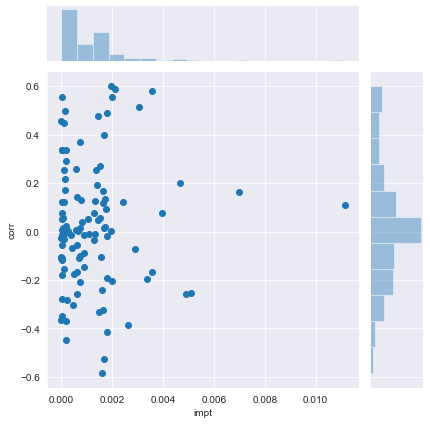

In [5]:
sns.set_style("darkgrid")
sns.jointplot(x="impt", y="corr", data=df)

The full set of results is available in the result.csv file

## Discussion

We will first make a few preliminary observations regarding the results before discussing a few of the strongest predictors.

The factors with the highest importance tended to have positive correlations with violent crime, while the factors with the lowest importance tended to have negative correlations with violent crime. Little to no useful information can be drawn from this observation. The opposite could just as easily have been the case had the categories been inverted. For example, if party_Democratic was replaced by party_Republican. The new variable would have just as strong predictive power but would be negatively correlated to crime instead.

The most significant predictor of violent crime rates is the size of the Puerto Rican population in a city. This does not necessarily suggest a causal relationship, or that Puerto Ricans contribute disproportionately to crime. As Puerto Ricans in the US are mostly migrants from Puerto Rico, the link between the Puerto Rican population and crime may be a result of immigrant destinations being more urban, and urban areas tending to have more dense populations and hence higher crime.

The magnitude of this effect is also relatively low, which is within reason. Puerto Ricans tend to be a very small minority in US cities. Even if Puerto Ricans had much higher levels of criminality, it would likely have only a small effect on the overall level of crime.

The next most important factor is whether the city is governed by a Democratic mayor. The mayor of the city is responsible for city governance, and in particular, for the city's law enforcement. It is therefore no surprise that the way a city is governed has an impact on the rates of violent crime. The result above suggests a strong link between a mayor's party affiliation and the city's governance, and between the city's governance and it's crime rates.

The third and fourth strongest predictors are regarding race, as are the sixth and ninth. There is no straightforward interpretation of these results. The negative correlation between the percentage of Whites in a city may be a proxy for racial homogeneity as opposed to a function of the levels of criminality of White individuals. The same cannot be said for minority groups: Asian Indians and Chinese. An increase in the percentage of these minority groups in a city may even be a weak proxy for racial diversity. Lower rates of criminality among these groups is not the only explanation for the result. Alternative explanations may have to do with immigrant destinations, mobility, and economics.

The sixth factor, also to do with race, the percentage of individuals of two or more races, including one race other than White, Black, Hispanic, Asian, Native Hawaiian or Pacific Islander, is harder to interpret. We suspect that this could be the result of a small number of anomalous data-points. Further analysis of the dataset can be performed to confirm or reject this hypothesis.

The relationship between race and crime is a complicated, and controversial one. The methodology adopted here is certainly not the most appropriate for studying the relative levels of criminality among different races. Using data on offenders may be more appropriate than using city-level data. Offender data is available in FBI publications, a good starting point for researchers interested in this topic.

The fifth most important factor is the percentage of individuals who carpool to work. It is difficult to imagine a direct causal relationship between carpooling and violent crime. As such, we hypothesize that carpooling serves as a proxy for how urban a city is. More urban cities as opposed to rural ones rely more heavily on carpooling services. An alternative theory may have to do with age, as younger populations would tend to use carpooling services more as well.

Two more factors are worth discussing, which broadly fall under the theme of poverty and dependence. The extensiveness of the use of Food Stamps/SNAP has relatively high predictive power and an extremely large correlation with violent crime rates. Similarly for the percentage of families under the poverty line with all children under the age of 5. This lends a great amount of support to the claim that crime is often a function of poverty, dependence, and desperation. It must, however, be noted that both poverty and dependence (measured by their proxies in this case) are independently very strong predictors of the violent crime rate. Neglecting either factor results in a poorer predictive model. This suggests that the relationship between dependence and crime is not merely a function of poverty and that the relationship between poverty and crime is not merely a function of dependence. The two factors are different in a meaningful way, and both must be considered when trying to understand crime.

Few clear conclusions can be drawn from the results above. However, a more targeted analysis of the data processed for this project may reveal some insights. We hope that the high-level results presented above may provide some direction for further research.